In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # for Dickey-Fuller Test
from additional import DickeyFuller

In [2]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")

In [3]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233


In [4]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7079 non-null   object 
 1   Open       7079 non-null   float64
 2   High       7079 non-null   float64
 3   Low        7079 non-null   float64
 4   Close      7079 non-null   float64
 5   Adj Close  7079 non-null   float64
 6   Volume     7079 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 387.3+ KB


In [5]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [7]:
RELIANCE = RELIANCE[RELIANCE["Date"] >= '2018-01-01'].reset_index(drop = True)

In [8]:
DickeyFuller.StationarityCheck(RELIANCE)

Results of Dickey Fuller Test
Test Statistics: -0.4886074396213302
p-value: 0.8942205699715091
Number of lags used: 3
Number of observations used: 1521
critical value (1%): -3.434656620970318
critical value (5%): -2.863442104538126
critical value (10%): -2.5677826540508275


In [9]:
RELIANCE['log Adj Close'] = np.log(RELIANCE['Adj Close'])
RELIANCE_log_moving_avg = RELIANCE['log Adj Close'].rolling(12).mean()
RELIANCE_log_std = RELIANCE['log Adj Close'].rolling(12).std()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

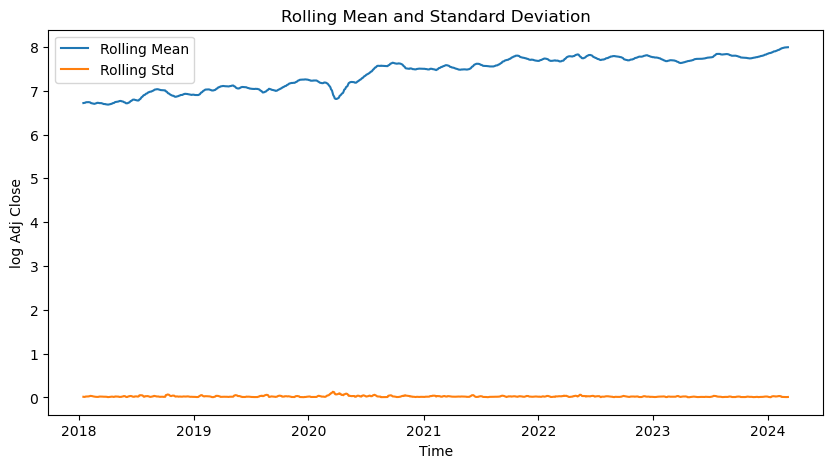

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(RELIANCE['Date'], RELIANCE_log_moving_avg, label="Rolling Mean")
plt.plot(RELIANCE['Date'], RELIANCE_log_std, label="Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

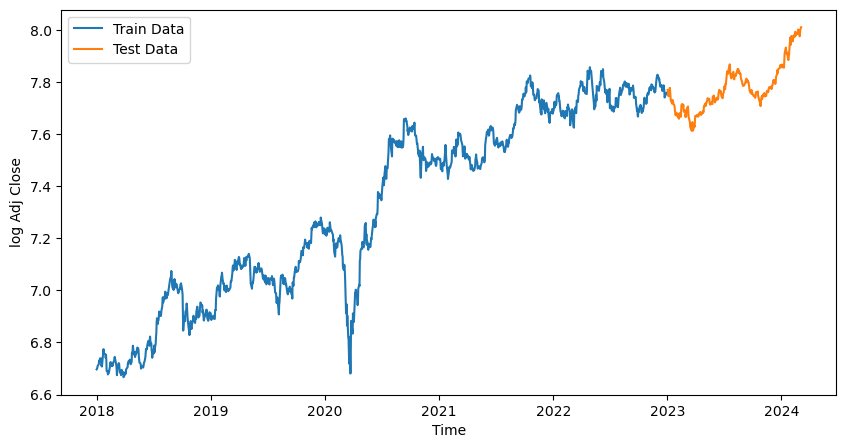

In [13]:
RELIANCE_Train_Data = RELIANCE[RELIANCE['Date'] < '2023-01-01']
RELIANCE_Test_Data = RELIANCE[RELIANCE['Date'] >= '2023-01-01'].reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(RELIANCE_Train_Data['Date'], RELIANCE_Train_Data['log Adj Close'], label='Train Data')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')